In [1]:
# -*- coding: utf-8 -*-
#import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
#import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
#import contextily as ctx
from pylab import figure, scatter, show
import warnings
# warnings.filterwarnings('ignore')
# %matplotlib inline
from math import cos

#import geoplot as gplt
#import geoplot.crs as gcrs
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

In [3]:
year = 2020 
scattergdf = gpd.read_file(f'../result/data/osm_poi_data_selected/{year}/greater-london-{year}-free-selected.shp')
scattergdf = scattergdf.to_crs(crs='OSGB36 / British National Grid + ODN height') #change Latitude and longitude to Cartesian coordinate system
scattergdf

,osm_id,code,fclass,name,class,geometry
0,20849687,2303,cafe,None,2.0,POINT (515967.301 169339.234)
1,25475389,2303,cafe,Woburn Cafe,2.0,POINT (529872.043 182516.376)
2,25497832,2303,cafe,Cafe Angel,2.0,POINT (530788.556 182337.753)
3,25696354,2303,cafe,Crazy Horse Cafe,2.0,POINT (533579.505 185455.618)
4,25991205,2303,cafe,Jack's Cafe,2.0,POINT (533738.781 185323.442)
...,...,...,...,...,...,...
13841,6457582585,2504,mall,None,1.0,POINT (534164.339 176712.156)
13842,6498189131,2504,mall,Hadson Mall,1.0,POINT (526776.955 182034.149)
13843,3753647145,2306,food_court,Ethos,2.0,POINT (529217.767 181360.614)
13844,5718576951,2306,food_court,None,2.0,POINT (540913.615 184231.717)


In [4]:
df_map = gpd.read_file('../data/statistical-gis-boundaries-london/ESRI', crs='ESRI:54004')
df_map

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18..."
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19..."
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19..."
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18..."
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19..."


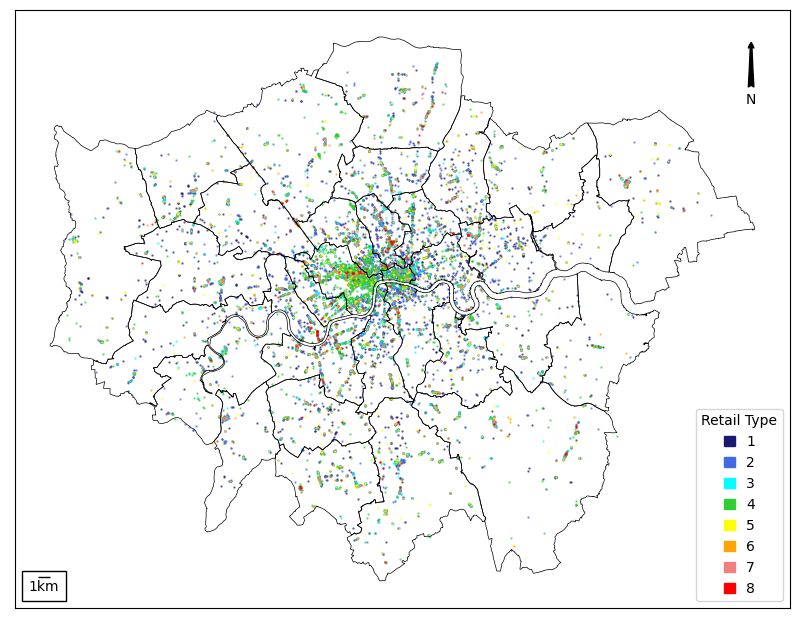

In [5]:
color = ['midnightblue','royalblue','cyan','limegreen','yellow','orange','lightcoral','red']
labels = ['1','2','3','4','5','6','7','8']
# draw the london map 
fig,ax = plt.subplots(figsize=(10,10))
# draw the london borough
df_map.plot(ax=ax,facecolor='none',edgecolor='k',lw=0.5,zorder=12)

# draw 8 types of retail shops 
for i in range(1,9):
    scattergdf[scattergdf['class']==i].plot(ax=ax,color=color[i-1],marker='o',
                                            markersize=0.5,alpha=0.6)

## add the borough name 
#centroids = df_map.geometry.centroid
#for i,p in enumerate(centroids):
#    ax.text(p.x,p.y,s = df_map.loc[i,'NAME'],fontsize=10,color='k',zorder=13,
#            horizontalalignment='center')

#ax.axis('off')
plt.xticks([])
plt.yticks([])

#plot North arrow
x,y,arrow_length = 0.95,0.95,0.1
ax.annotate('N',xy=(x,y),xytext=(x,y-arrow_length),
            ha = 'center',va='center',fontsize=10,
            arrowprops=dict(arrowstyle='Fancy',facecolor='black'),
            xycoords=ax.transAxes)

#plot scale bar
size = 1000  # distance
iow_scale_bar = AnchoredSizeBar(ax.transData,
                                size=size,label='1km',loc='lower left',pad=0.5,
                                borderpad=0.5,color='black',
                                frameon=True)#,size_vertical=0.5)
ax.add_artist(iow_scale_bar)

#plot legend
legend_elements = [Patch(facecolor=color[i], edgecolor=color[i],
                      label=labels[i]) for i in range(0,8)]

ax.legend(handles=legend_elements, loc='lower right',handlelength=0.8,fontsize=10,title='Retail Type')
    
path_out = '../result/plot/'
filename = f'{year}_London_map_with_retail_positions'
plt.savefig(path_out+filename+'.png',
                dpi=500,bbox_inches = 'tight')

In [6]:
def find_code(point):
    for name, polygon in zip(df_map['GSS_CODE'], df_map['geometry']):
        if point.within(polygon):
            return name
    return ''
scattergdf['GSS_CODE'] = scattergdf['geometry'].apply(find_code)
scattergdf

,osm_id,code,fclass,name,class,geometry,GSS_CODE
0,20849687,2303,cafe,None,2.0,POINT (515967.301 169339.234),E09000027
1,25475389,2303,cafe,Woburn Cafe,2.0,POINT (529872.043 182516.376),E09000007
2,25497832,2303,cafe,Cafe Angel,2.0,POINT (530788.556 182337.753),E09000007
3,25696354,2303,cafe,Crazy Horse Cafe,2.0,POINT (533579.505 185455.618),E09000012
4,25991205,2303,cafe,Jack's Cafe,2.0,POINT (533738.781 185323.442),E09000012
...,...,...,...,...,...,...,...
13841,6457582585,2504,mall,None,1.0,POINT (534164.339 176712.156),E09000028
13842,6498189131,2504,mall,Hadson Mall,1.0,POINT (526776.955 182034.149),E09000033
13843,3753647145,2306,food_court,Ethos,2.0,POINT (529217.767 181360.614),E09000033
13844,5718576951,2306,food_court,None,2.0,POINT (540913.615 184231.717),E09000025


In [7]:
temp = scattergdf['GSS_CODE'].value_counts()
temp = pd.DataFrame(temp)
temp.rename(columns={'GSS_CODE':'Retail_count'},inplace=True)
temp['GSS_CODE'] = temp.index
df_map2 = pd.merge(df_map,temp,left_on='GSS_CODE', right_on = 'GSS_CODE',
                   how='left')
df_map2 = df_map2.fillna(value={'Retail_count':0})
df_map2['Retail_Density']  = df_map2['Retail_count']/df_map2.area
df_map2.loc[0,'NAME'] = 'Kingston'
df_map2.loc[16,'NAME'] = 'Waltham\nForest'
df_map2.loc[19,'NAME'] = 'Richmond'
df_map2.loc[22,'NAME'] = 'Hammersmith'
df_map2.loc[23,'NAME'] = 'Kensington'
df_map2.loc[26,'NAME'] = 'Tower\nHamlets'
df_map2.loc[31,'NAME'] = 'Barking & \nDagenham'
df_map2.loc[32,'NAME'] = 'City of\nLondon'
df_map2

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Retail_count,Retail_Density
0,Kingston,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",119,0.000003
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",459,0.000005
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",360,0.000002
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",150,0.000003
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",344,0.000006
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18...",189,0.000002
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19...",169,0.000001
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19...",259,0.000005
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18...",270,0.000006
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19...",368,0.000004


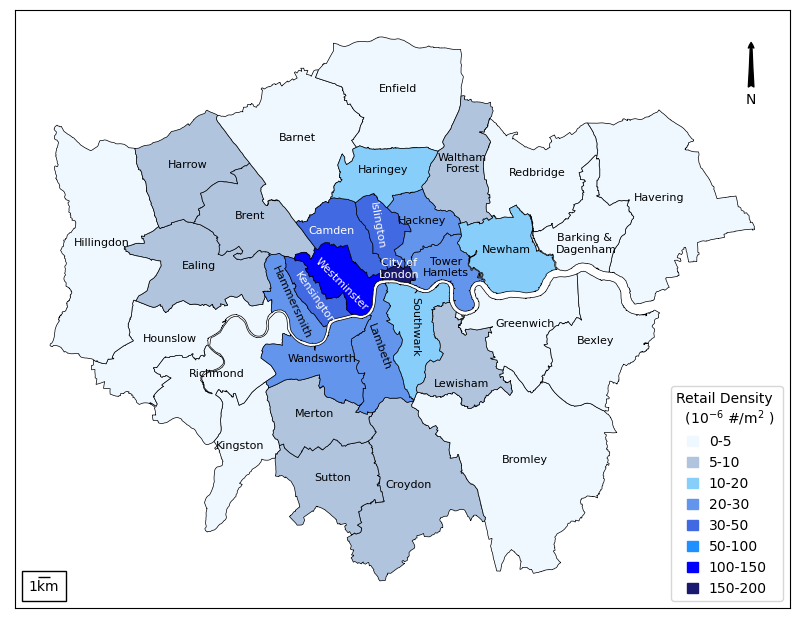

In [8]:
import matplotlib.colors as colors
levels0 = [0,5,10,20,30,50,100,150,200]
levels = [i*1e-6 for i in levels0]
#color = ['aliceblue','royalblue','cyan','limegreen','yellow','orange','lightcoral','red']
color = ['aliceblue','lightsteelblue','lightskyblue','cornflowerblue',
        'royalblue','dodgerblue','blue','midnightblue']
cmap = colors.ListedColormap(color)
norm = colors.BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# draw the ratail density for Borough 
fig,ax = plt.subplots(figsize=(10,10))
# draw the positions of retail shops
df_map2.plot(ax=ax,edgecolor='k',lw=0.5,zorder=12,
             norm=norm,cmap=cmap,column='Retail_Density')

# add the borough name 
centroids = df_map.geometry.centroid
cc = 'k'

for i,p in enumerate(centroids):
    if(df_map2.loc[i,'Retail_Density']>30*1e-6):
        cc = 'w'
    
    if i==10:
        ax.text(p.x,p.y-1000,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=-70)    
    elif i==11:
        ax.text(p.x,p.y-2000,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=-90)  
    elif i==12:
        ax.text(p.x,p.y-2000,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=0)
    elif i==31:
        ax.text(p.x,p.y-2000,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=0)
    elif i==26:
        ax.text(p.x,p.y-500,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=0)
    elif i==16:
        ax.text(p.x,p.y-500,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=0)
    elif i==22:
        ax.text(p.x,p.y-3000,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=-65)
    elif i==23:
        ax.text(p.x,p.y-2500,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=-55)
    elif i==24:
        ax.text(p.x,p.y-2800,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=-45)
    elif i==25:
        ax.text(p.x-1000,p.y,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=0)
    elif i==27:
        ax.text(p.x-500,p.y-1500,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=-80)
    elif i==32:
        ax.text(p.x,p.y-300,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=0)
    else:
        ax.text(p.x,p.y,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=0)
    cc = 'k'

#ax.axis('off')
plt.xticks([])
plt.yticks([])

#plot North arrow
x,y,arrow_length = 0.95,0.95,0.1
ax.annotate('N',xy=(x,y),xytext=(x,y-arrow_length),
            ha = 'center',va='center',fontsize=10,
            arrowprops=dict(arrowstyle='Fancy',facecolor='black'),
            xycoords=ax.transAxes)

#plot scale bar
size = 1000  # distance
iow_scale_bar = AnchoredSizeBar(ax.transData,
                                size=size,label='1km',loc='lower left',pad=0.5,
                                borderpad=0.5,color='black',
                                frameon=True)#,size_vertical=0.5)
ax.add_artist(iow_scale_bar)

#plot legend
labels2 = [f'{levels0[i]}-{levels0[i+1]}' for i in range(len(levels)-1)]
legend_elements = [Patch(facecolor=color[i], edgecolor=color[i],
                      label=labels2[i]) for i in range(len(levels)-1)]

ax.legend(handles=legend_elements, loc='lower right',handlelength=0.8,fontsize=10,title='Retail Density \n  (10$^{-6}$ #/m$^{2}$ )')
    
path_out = '../result/plot/'
filename = f'{year}_London_borough_with_retail_density'
plt.savefig(path_out+filename+'.png',
                dpi=500,bbox_inches = 'tight')

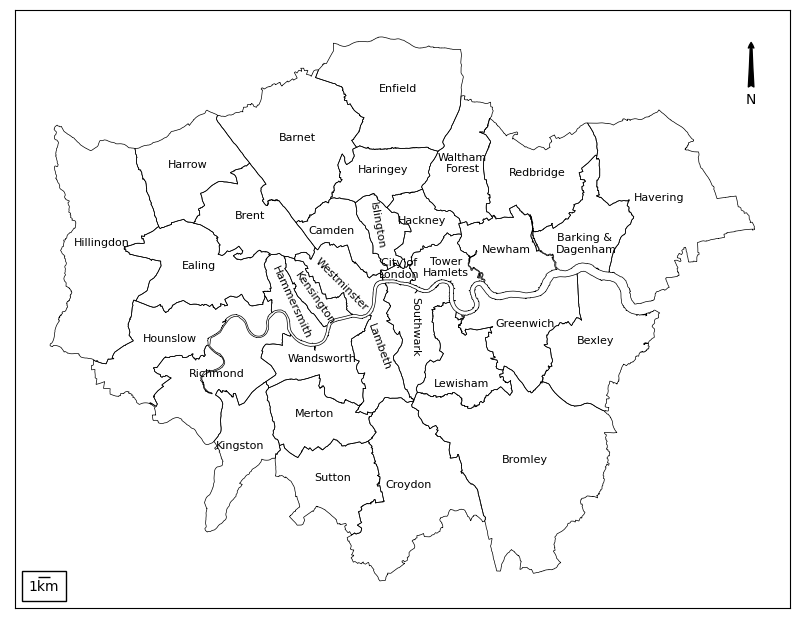

In [9]:
# draw the ratail density for Borough 
fig,ax = plt.subplots(figsize=(10,10))
# draw the positions of retail shops
df_map2.plot(ax=ax,edgecolor='k',lw=0.5,zorder=12,facecolor='none'
             )

# add the borough name 
centroids = df_map.geometry.centroid
cc = 'k'

for i,p in enumerate(centroids):
    if(df_map2.loc[i,'Retail_Density']>30*1e-6):
        cc = 'k'
    
    if i==10:
        ax.text(p.x,p.y-1000,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=-70)    
    elif i==11:
        ax.text(p.x,p.y-2000,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=-90)  
    elif i==12:
        ax.text(p.x,p.y-2000,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=0)
    elif i==31:
        ax.text(p.x,p.y-2000,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=0)
    elif i==26:
        ax.text(p.x,p.y-500,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=0)
    elif i==16:
        ax.text(p.x,p.y-500,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=0)
    elif i==22:
        ax.text(p.x,p.y-3000,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=-65)
    elif i==23:
        ax.text(p.x,p.y-2500,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=-55)
    elif i==24:
        ax.text(p.x,p.y-2800,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=-45)
    elif i==25:
        ax.text(p.x-1000,p.y,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=0)
    elif i==27:
        ax.text(p.x-500,p.y-1500,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=-80)
    elif i==32:
        ax.text(p.x,p.y-300,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=0)
    else:
        ax.text(p.x,p.y,s = df_map2.loc[i,'NAME'],fontsize=8,color=cc,zorder=13,
                horizontalalignment='center',rotation=0)
    cc = 'k'

#ax.axis('off')
plt.xticks([])
plt.yticks([])

#plot North arrow
x,y,arrow_length = 0.95,0.95,0.1
ax.annotate('N',xy=(x,y),xytext=(x,y-arrow_length),
            ha = 'center',va='center',fontsize=10,
            arrowprops=dict(arrowstyle='Fancy',facecolor='black'),
            xycoords=ax.transAxes)

#plot scale bar
size = 1000  # distance
iow_scale_bar = AnchoredSizeBar(ax.transData,
                                size=size,label='1km',loc='lower left',pad=0.5,
                                borderpad=0.5,color='black',
                                frameon=True)#,size_vertical=0.5)
ax.add_artist(iow_scale_bar)

path_out = '../result/plot/'
filename = f'{year}_London_borough_map'
plt.savefig(path_out+filename+'.png',
                dpi=500,bbox_inches = 'tight')

In [10]:
# LSOA data
df_map_LSOA = gpd.read_file('../data/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp', crs='ESRI:54004')
df_map_borough = gpd.read_file('../data/statistical-gis-boundaries-london/ESRI', crs='ESRI:54004')

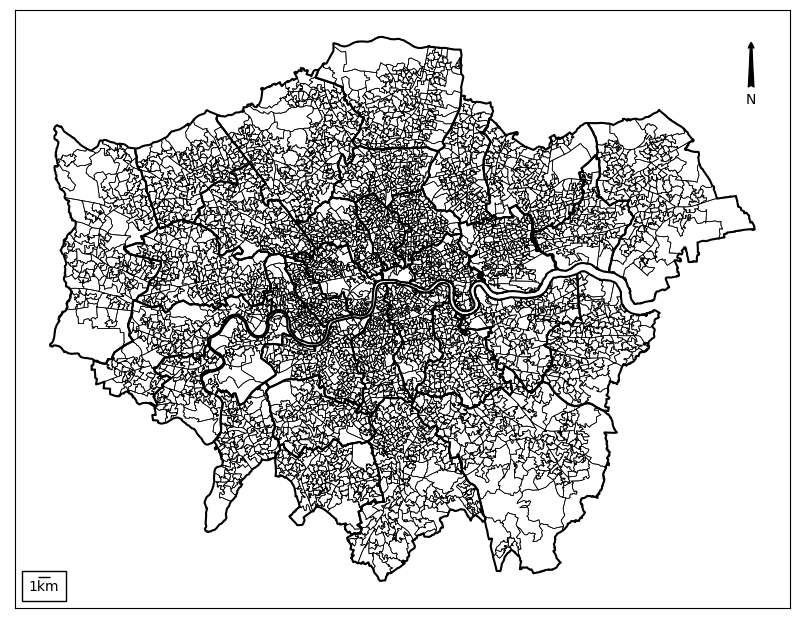

In [11]:
fig,ax = plt.subplots(figsize=(10,10))
# draw the positions of retail shops
df_map_LSOA.plot(ax=ax,edgecolor='k',facecolor='none',lw=0.5,zorder=12,
             )

# add the borough name 
#centroids = df_map_borough.geometry.centroid
#for i,p in enumerate(centroids):
#    ax.text(p.x,p.y,s = df_map_borough.loc[i,'NAME'],fontsize=10,color='k',zorder=13,
#            horizontalalignment='center')
df_map_borough.plot(ax=ax,edgecolor='k',lw=1.5,zorder=14,facecolor='none')

#ax.axis('off')
plt.xticks([])
plt.yticks([])

#plot North arrow
x,y,arrow_length = 0.95,0.95,0.1
ax.annotate('N',xy=(x,y),xytext=(x,y-arrow_length),
            ha = 'center',va='center',fontsize=10,
            arrowprops=dict(arrowstyle='Fancy',facecolor='black'),
            xycoords=ax.transAxes)

#plot scale bar
size = 1000  # distance
iow_scale_bar = AnchoredSizeBar(ax.transData,
                                size=size,label='1km',loc='lower left',pad=0.5,
                                borderpad=0.5,color='black',
                                frameon=True)#,size_vertical=0.5)
ax.add_artist(iow_scale_bar)

path_out = '../result/plot/'
filename = f'London_LSOA_map'
plt.savefig(path_out+filename+'.png',
                dpi=500,bbox_inches = 'tight')